## 프로젝트 기반 빅데이터 서비스 솔루션 개발 전문과정

### 교과목명 : 통계
- 평가일 : 22.2.4
- 성명 : 정현우
- 점수 : 91

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats
import scipy as sp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Q1. df에서 mathematics 점수의 평균값, 중앙값, 최빈값, 분산, 표준편차, 범위, IQR을 구하세요.

In [65]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [66]:
print(df.mathematics.mean())
print(df.mathematics.median())
print(df.mathematics.mode()[0])
print(df.mathematics.var())
print(df.mathematics.std())
print(df.mathematics.describe()[3],'-',df.mathematics.describe()[7])
print(df.mathematics.describe()[6]-df.mathematics.describe()[4])

78.88
80.0
77
70.80163265306118
8.414370603500965
57.0 - 94.0
8.0


Q2. df.english를 표준화한 후 배열로 변환하여 처음 5개 원소를 출력하세요.

In [67]:
score = df.english
type(score)

pandas.core.series.Series

In [68]:
z = (score - np.mean(score)) / np.std(score)
z.tolist()[:5]

[-1.6884301154677805,
 1.094696448490099,
 -0.24532745267480596,
 -1.7915088770958503,
 -0.14224869104673635]

Q3. score에 대하여 다음사항을 수행하세요.
- 상자그림으로 시각화하여 이상치 여부를 탐색
- 이상치 값 및 인덱스 출력
- 이상치 삭제
- 상자그림으로 시각화하여 이상치 제거 여부 재확인.

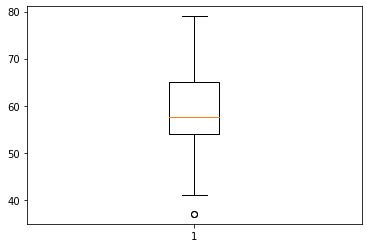

In [69]:
# 상자 그림

plt.boxplot(score)
plt.show()


In [89]:
score.describe()
a_25 = np.percentile(score,25)
a_75 = np.percentile(score,75)
IQR = a_75-a_25

lw=a_25-(IQR*1.5)
uw=a_75+(IQR*1.5)

s1=score[score<lw]
s2=score[score>uw]
print(s1)
print()
print(s2)
cleanScore=score[score>lw]

student number
20    37
35    37
Name: english, dtype: int64

Series([], Name: english, dtype: int64)


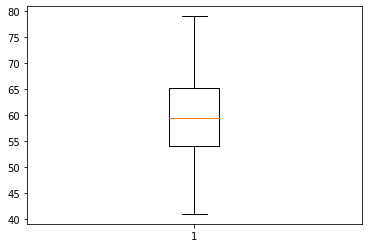

In [87]:
plt.boxplot(cleanScore)
plt.show()

Q4. 아래 scores_df에 대해서 아래사항을 수행하세요
- scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력
- scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력
- 두개 변수의 상관관계와 회귀직선을 시각화(회귀직선 포함 및 미포함 비교하여 1행 2열로 출력) 
- 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)

In [107]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [108]:
cov = np.cov(scores_df.english, scores_df.mathematics, ddof=1)
round(cov[1,0],2)

69.78

In [109]:
round(scores_df.corr(),2)

,english,mathematics
english,1.00,0.82
mathematics,0.82,1.00


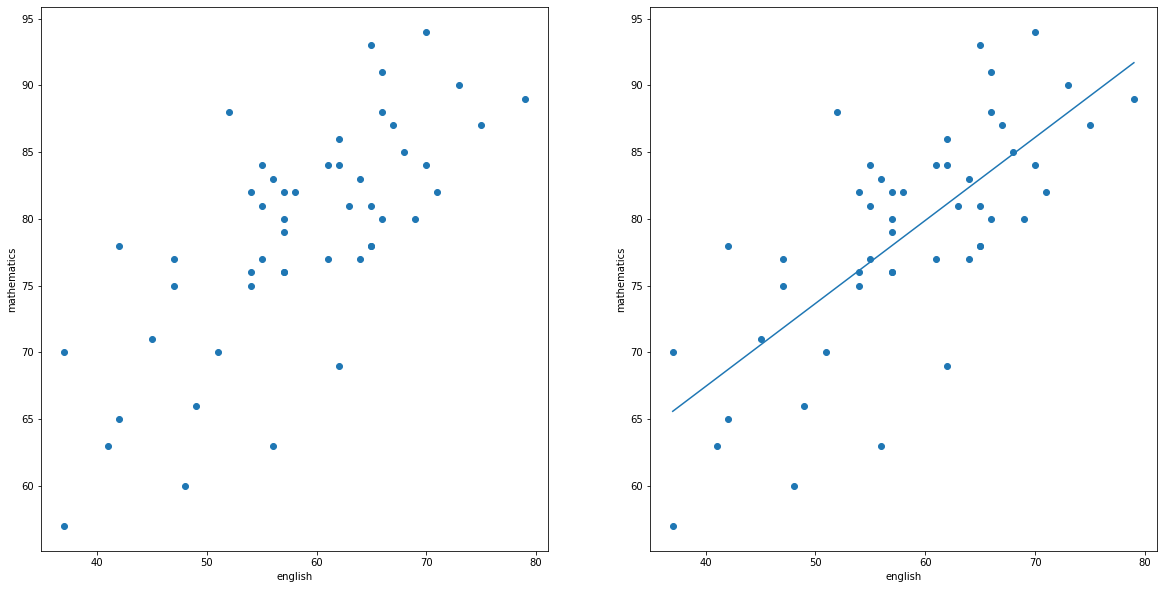

In [127]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

# 산점도
ax1.scatter(df['english'], df['mathematics'])
ax1.set_xlabel('english')
ax1.set_ylabel('mathematics')

#직선
poly_fit = np.polyfit(df['english'], df['mathematics'], 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(df['english'].min(), df['english'].max())
ys = poly_1d(xs)
ax2.set_xlabel('english')
ax2.set_ylabel('mathematics')
ax2.scatter(df['english'], df['mathematics'], label='score')
ax2.plot(xs, ys)
plt.show()



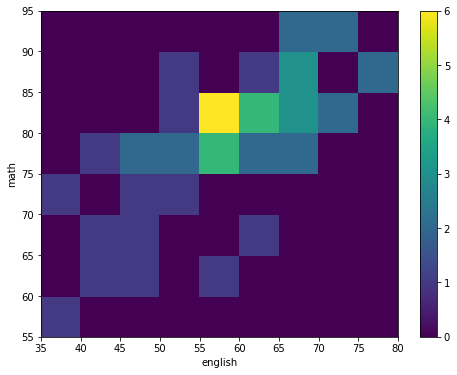

In [134]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
c=ax.hist2d(df['english'], df['mathematics'],bins=[9,8], range=[(35,80),(55,95)])
ax.set_xlabel('english')
ax.set_ylabel('math')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3],ax=ax)
plt.show()

Q5. 아래 scores는 전교생의 시험점수이다. 무작위추출로 표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행해서 그 결과를 히스토그램으로 그려 표본평균이 어떻게 분포되는지 시각화를 수행하세요.

In [136]:
df = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

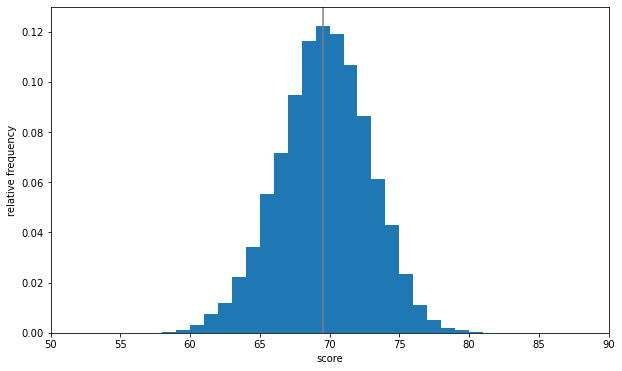

In [152]:
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

Q6. Bern(0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요. 

In [156]:
p=0.5
rv = stats.bernoulli(p)
rv.mean(), rv.var()

(0.5, 0.25)

Q7. Bin(10,0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

In [157]:
rv = stats.binom(10,0.5)
rv.mean(), rv.var()

(5.0, 2.5)

Q8. Poi(2)을 따른 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

In [159]:
rv = stats.poisson(2)
rv.mean(), rv.var()

(2.0, 2.0)

Q9. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현하세요. 

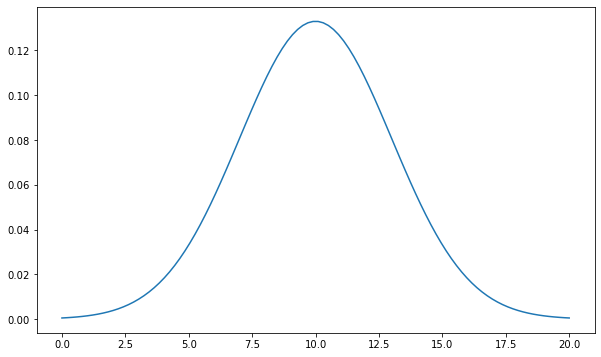

In [166]:
rv = stats.norm(10, 3)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
xs = np.linspace(0, 20, 100)
ax.plot(xs, rv.pdf(xs))

plt.show()

Q10. 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현하세요. 

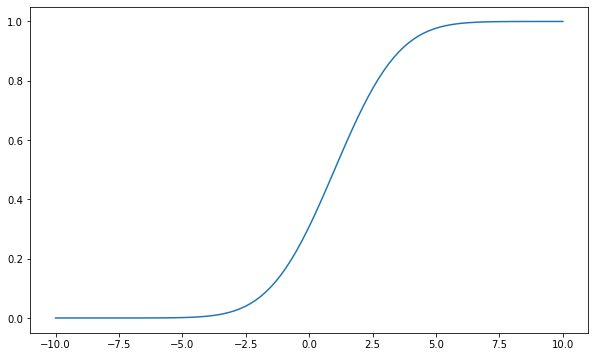

In [171]:
rv = stats.norm(1, 2)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
xs = np.linspace(-10, 10, 100)
ax.plot(xs, rv.cdf(xs))

plt.show()

Q11. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [344]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("./data/5_2_fm.csv")
df2 =df1.copy()

df2.species[df2.species=='A']='C'
df2.species[df2.species=='B']='D'
df2.length[df2.species=='C']=df2.length*2
df2.length[df2.species=='D']=df2.length*3
df=pd.concat([df1,df2])
grp=df.groupby(['species'])
grp.describe()



length                                         
         count  mean  std   min   25%   50%   75%   max
species                                                
A          3.0   3.0  1.0   2.0   2.5   3.0   3.5   4.0
B          3.0   8.0  2.0   6.0   7.0   8.0   9.0  10.0
C          3.0   6.0  2.0   4.0   5.0   6.0   7.0   8.0
D          3.0  24.0  6.0  18.0  21.0  24.0  27.0  30.0

Q12. "./dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성
- 피봇을 이용해서 교차분석표 작성(values='sales',aggfunc='sum', index= 'store', columns = 'color')
- 독립성 검정을 수행(보너스 문제)

In [349]:
import pandas as pd
shoes = pd.read_csv("./data/5_2_shoes.csv")
shoes1=shoes.copy()
shoes1


,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [350]:
df1=pd.concat([shoes1,shoes1])
df1

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [351]:
table=pd.pivot_table(df1,values='sales',aggfunc='sum', index= 'store', columns = 'color')
table

color,blue,red
store,,
osaka,26,18
tokyo,20,30


Q13. 'dataset/titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

In [270]:
titanic = pd.read_csv('data/titanic3.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [275]:
titanic
table=pd.pivot_table(titanic,values='survived',aggfunc='mean', index= 'pclass', columns = 'sex')
table

sex,female,male
pclass,,
1,0.965278,0.340782
2,0.886792,0.146199
3,0.490741,0.152130


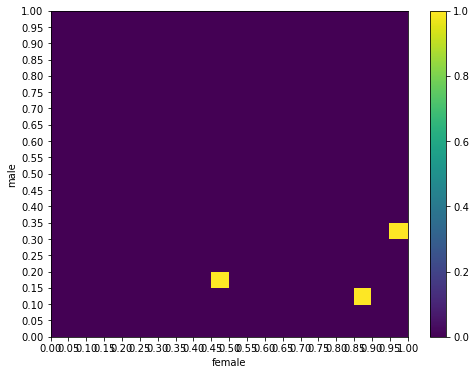

In [290]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
c=ax.hist2d(table.female, table.male,bins=[20,20], range=[(0,1),(0,1)])
ax.set_xlabel('female')
ax.set_ylabel('male')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3],ax=ax)
plt.show()

Q14. 평균 4, 표준편차 0.8인 정규분포에서 샘플사이즈 10인 표본 10000개의 표본평균을 배열로 저장하고 10개를 출력하세요.(넘파이 zeros 함수 이용)

In [299]:
arr=np.zeros(10000)
rv = stats.norm(4,0.8)
for i in range(10000):
    arr[i]=(rv.rvs(10).mean())
arr[:10]

array([3.74073153, 3.56317953, 4.60904724, 3.76216345, 3.76617732,
       4.41129174, 4.71450596, 4.09674326, 3.79943562, 3.82758954])

Q15. Q14에서 구한 배열의 히스토그램을 시각화하세요.(확률밀도 포함)

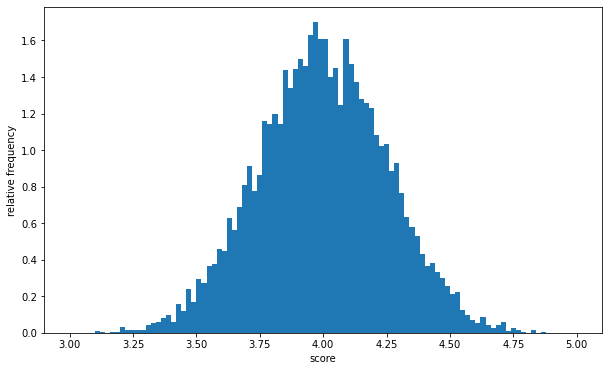

In [309]:

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(arr, bins=100, range=(3, 5), density=True)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

Q16. 서로 독립인 X\~N(1,2), Y\~N(2,3)이 있을 때 확률변수 X + Y의 분포는 N(3,5)를 따른다는 것을 시각화하여 출력하세요.

In [312]:
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)

sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(2.998143902570419, 4.99666043991738)

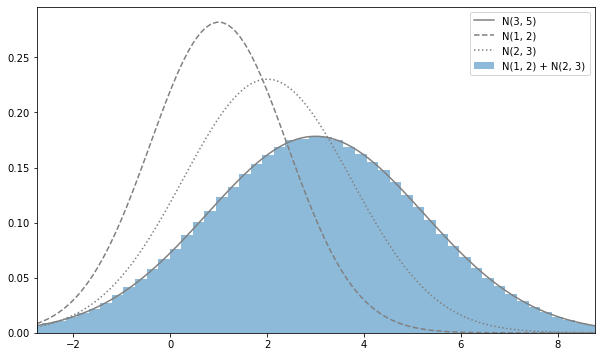

In [313]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True,
        alpha=0.5, label='N(1, 2) + N(2, 3)')
ax.plot(xs, rv.pdf(xs), label='N(3, 5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':', color='gray' )

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

Q17. 서로 독립인 X ~ Poi(3)과 Y ~ Poi(4)가 있을 때 확률변수 X + Y도 포아송 분포를 따른다는 것을 시각화하여 출력하세요.

In [314]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(7.00568, 6.991389737599999)

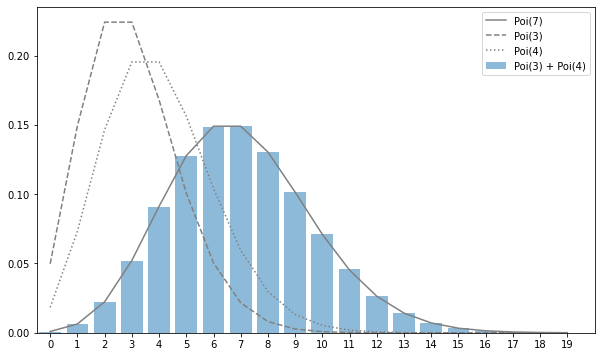

In [315]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist, _ = np.histogram(sum_sample, bins=20,
                       range=(0, 20), normed=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)',  color='gray')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='gray')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':',  color='gray')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

Q18. 베르누이 분포의 합은 이항분포가 되는 성질을 시각화하여 출력하세요 

In [316]:
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

(2.999617, 2.1046888533109995)

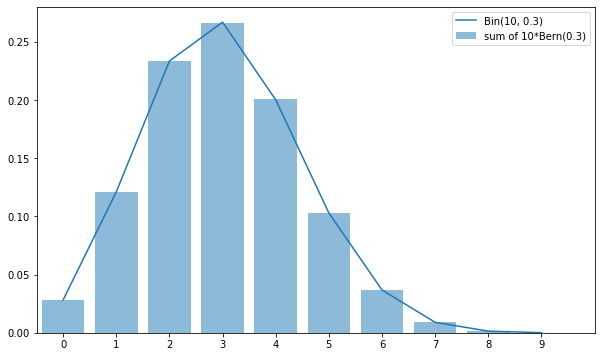

In [317]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10,
                       range=(0, 10), normed=True)
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')
ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

Q19. 포아송 분포의 표본분포는 근사적으로 정규분포를 따른다는 것을 시각화하고 그 핵심 근거인 중심극한정리에 대하여 설명하세요.

In [318]:
l = 3
rv = stats.poisson(l)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(3.0001720000000005, 0.299286550416)

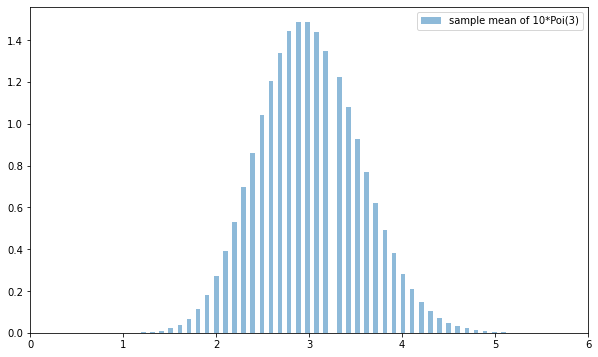

In [319]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10*Poi(3)')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

In [320]:
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

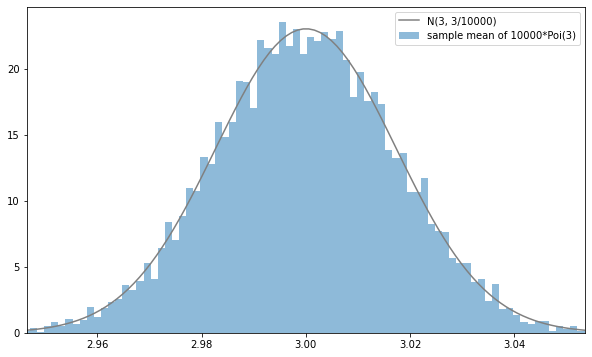

In [321]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

Q20. 아래 df 데이터셋에서 "무게의 평균이 130kg이다."라는 귀무가설에 대한 유의성 검정을 수행하세요. 

In [327]:
df = pd.read_csv('./data/ch11_potato.csv')
print(df.head(),len(df))

       무게
0  122.02
1  131.73
2  130.60
3  131.82
4  132.05 14


In [328]:
sample = np.array(df['무게'])
sample

array([122.02, 131.73, 130.6 , 131.82, 132.05, 126.12, 124.43, 132.89,
       122.79, 129.95, 126.14, 134.45, 127.64, 125.68])

In [329]:
s_mean = np.mean(sample)
s_mean

128.4507142857143

In [333]:
def pmean_test(sample, mean0, p_var, alpha=0.05):
    s_mean = np.mean(sample)
    n = len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)

    z = (s_mean - mean0) / np.sqrt(p_var/n)
    if interval[0] <= z <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if z < 0:
        p = rv.cdf(z) * 2
    else:
        p = (1 - rv.cdf(z)) * 2
    print(f'p값은 {p:.3f}')

In [334]:
pmean_test(sample, 130, 9)

귀무가설을 채택
p값은 0.053
